<a href="https://colab.research.google.com/github/areuschel/Trend-Analysis-with-Pandas/blob/main/ChicagoAQPandasProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas Tutorial: Chicago AQ

In [ ]:
import pandas as pd
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Load a file by ID and create local file.

downloaded = drive.CreateFile({'id':'184IguAwnV4QIp9pDjUAoTleza4ySZY2z'})
downloaded.GetContentFile('Chicago AQ.csv')

# 3. Create Data Frame, Look at Data

df = pd.read_csv("Chicago AQ.csv")
df.head(5)
# df.info()
# df.shape
# df.describe()

# 4. Make Data more readable

df = df.rename(columns={'dptp': 'dewpoint', 'pm25tmean2': 'pm25', 'tmpd': 'temp',
                        'pm10tmean2': 'pm10', 'o3tmean2': 'ozone', 'no2tmean2': 'no2'})
df.head(5)



,Unnamed: 0,city,temp,dewpoint,date,pm25,pm10,ozone,no2
0,0,chic,31.5,31.500,1987-01-01,NaN,34.000000,4.250000,19.988095
1,1,chic,33.0,29.875,1987-01-02,NaN,NaN,3.304348,23.190994
2,2,chic,33.0,27.375,1987-01-03,NaN,34.166667,3.333333,23.815476
3,3,chic,29.0,28.625,1987-01-04,NaN,47.000000,4.375000,30.434524
4,4,chic,32.0,28.875,1987-01-05,NaN,NaN,4.750000,30.333333


Note: The Montreal Protocol of 1987 was signed the year this data collection begins. This international agreement works to limit ozone depleting substances and was passed with the help of the climate change regime.

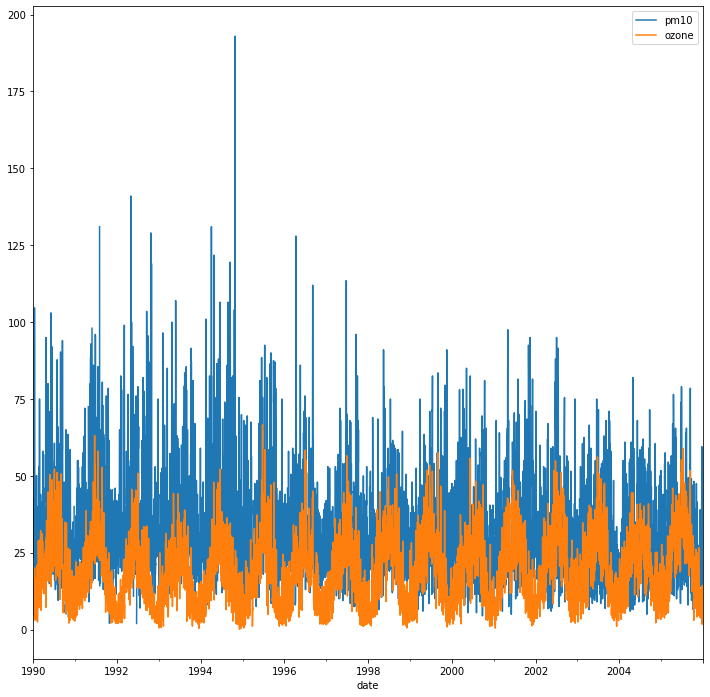

In [ ]:
# - Graph 03, PM10 measurements from 1990-2005

import datetime
import matplotlib.pyplot as plt
df_90 = df.copy()
df_90['date'] = pd.to_datetime(df_90['date'])
df_res = df_90[~(df_90['date'] < '1990-01-01')]

df_res.plot(x="date", y=["pm10", "ozone"],            # any plot created by pandas is a Matplotlib object
         kind="line", figsize=(12, 12))
plt.show()

Oscilating pattern shows relationship between temperature and air quality measurements.

In [ ]:
# - What month has the highest average PM10 levels?

df_dt = df.copy()
df_dt['date'] = pd.to_datetime(df_dt['date'])
df_dt.groupby(df_dt.date.dt.month)['pm10'].mean()

date
1     29.551890
2     31.473451
3     31.464468
4     33.148166
5     37.418058
6     39.939258
7     37.497445
8     37.736802
9     36.856715
10    34.778856
11    28.122777
12    28.586647
Name: pm10, dtype: float64

These averages display the steady increase in air quality measurements into the hotter summer months and back down into the winter months.

In [ ]:
# - Chicago’s worst AQ day: highest combined levels of PM10, 03, and PM2.5
      # divide by max on each and add to get ratio

df2 = df.copy()
df2 = df2.fillna(0)
pm10m = df2['pm10'].max()
o3m = df2['ozone'].max()                         #note this variable is an o not a 0
pm25m = df2['pm25'].max()


rowList = []
num = 0
for row in df2.index:
  r = df2.at[num, 'pm10']/pm10m
  o = df2.at[num, 'ozone']/o3m
  p = df2.at[num, 'pm25']/pm25m
  sum = r + o + p
  rowList.append(sum)
  if num < len(df2):
    num += 1
  elif num >= len(df2):
    break

# print(rowList)
x = max(rowList)
y = rowList.index(max(rowList))
print("The worst Chicago AQ day is at index:", y)
print("Here are the other recorded values for that day:")
print()
stat = df2.loc[6752]                             #could also put "y" here
print(stat)
print(rowList)


The worst Chicago AQ day is at index: 6752
Here are the other recorded values for that day:

Unnamed: 0          6752
city                chic
temp                82.0
dewpoint            64.6
date          2005-06-27
pm25             51.5375
pm10                79.0
ozone          55.235857
no2            28.549366
Name: 6752, dtype: object
[0.15697647806084794, 0.04962414606495213, 0.1436667515281258, 0.19447014562669881, 0.07133470996808709, 0.21911087909993798, 0.25186947171048496, 0.26820650893298803, 0.1587739893185771, 0.074463425317064, 0.3237118050337515, 0.19137554613226493, 0.21966890476911877, 0.18100826923702718, 0.14594994226735908, 0.17094597780119372, 0.08760402978486952, 0.20258800476250477, 0.31106150882940614, 0.21298888320291304, 0.22387417398859724, 0.30015300703832376, 0.3703207490401701, 0.25553941195080115, 0.10011889118378074, 0.26335228563321, 0.19786955914166443, 0.23201472982042887, 0.13969242585208974, 0.2936756233648896, 0.2544401613902811, 0.1207684124903

In [ ]:
# - What day had the highest temperature? What were the AQ readings from that day?

col = "temp"
max_x = df.loc[df[col].idxmax()]
print("Here is the information about the hottest day in Chicago and its corresponding air quality measurements:", max_x)
print()

# - What day had the lowest temperature? What were the AQ readings from that day?

col = "temp"
min_x = df.loc[df[col].idxmin()]
print("Here is the information about the coldest day in Chicago and its corresponding air quality measurements:", min_x)

Here is the information about the hottest day in Chicago and its corresponding air quality measurements: Unnamed: 0          3115
city                chic
temp                92.0
dewpoint          76.375
date          1995-07-13
pm25                 NaN
pm10                92.5
ozone          58.549524
no2            27.317754
Name: 3115, dtype: object

Here is the information about the coldest day in Chicago and its corresponding air quality measurements: Unnamed: 0          2574
city                chic
temp               -16.0
dewpoint         -25.625
date          1994-01-18
pm25                 NaN
pm10                27.0
ozone           14.65625
no2            22.102355
Name: 2574, dtype: object
